In [1]:
import json
import email.utils
import matplotlib.pyplot as plt

with open('pract3/table.json', encoding='utf8') as f:
    table = json.loads(f.read()) # Таблица решений задач
    
with open('pract3/failed.json', encoding='utf8') as f:
    failed = json.loads(f.read()) # Данные по ошибкам
    
with open('pract3/messages.json', encoding='utf8') as f:
    messages = json.loads(f.read()) # Полученные сообщения
    
messages = [(m['subj'].upper(), email.utils.parsedate(m['date'])) for m in messages]




Как по времени суток распределяется активность студентов?

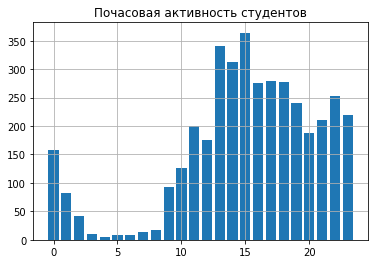

In [2]:
cnt = [0] * 24
x = range(0, 24)
for i in messages:
    cnt[i[1][3]] += 1
plt.figure()
plt.bar(x, cnt)
plt.title("Почасовая активность студентов");
plt.grid(True)

Как по дням недели распределяется активность студентов?

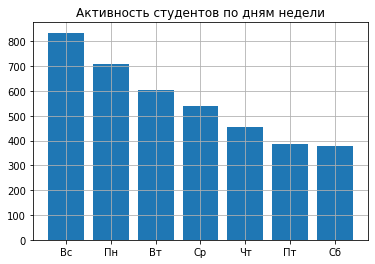

In [3]:
import datetime
cnt = [0] * 7
x = ["Вс", "Пн", "Вт", "Ср", "Чт", "Пт", "Сб"]
for i in messages:
    cnt[datetime.datetime(i[1][0], i[1][1],i[1][2]).weekday()] += 1
plt.figure()
plt.bar(x, cnt)
plt.title("Активность студентов по дням недели");
plt.grid(True)


В каких группах было отправлено больше всего сообщений?

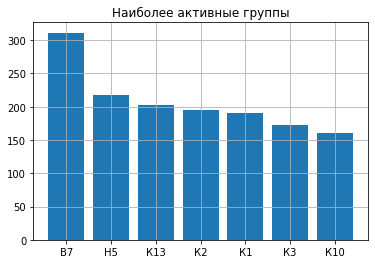

In [4]:
from collections import Counter

groupsToShow = 7

tmpMessages = [i[0].split()[0] for i in messages]
cnt = list(Counter(tmpMessages).items())
cnt.sort(key=lambda i : i[1], reverse = True)
x = [i[0] for i in cnt][:groupsToShow]
y = [i[1] for i in cnt][:groupsToShow]
plt.figure()
plt.bar(x, y)
plt.title("Наиболее активные группы");
plt.grid(True)


В каких группах было получено больше всего правильных решений?

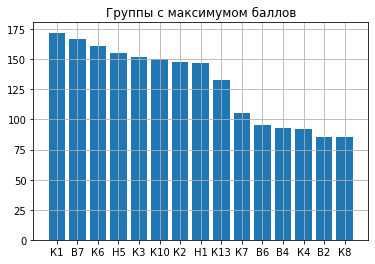

In [5]:
corAns = [i[0] for i in table['data'] if i[3] == 1]

groupsToShow = 15

cnt = list(Counter(corAns).items())
cnt.sort(key=lambda i : i[1], reverse = True)
x = [i[0] for i in cnt][:groupsToShow]
y = [i[1] for i in cnt][:groupsToShow]
plt.figure()
plt.bar(x, y)
plt.title("Группы с максимумом баллов");
plt.grid(True)

Какие задачи оказались самыми легкими, самыми сложными?

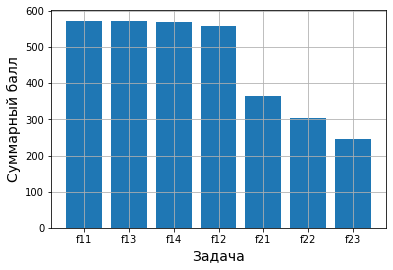

In [6]:
answeredTasks = [i[2] for i in table['data'] if i[3] == 1]

easiestToShow = 10

cnt = list(Counter(answeredTasks).items())
cnt.sort(key=lambda i : i[1], reverse = True)
x = [i[0] for i in cnt]
y = [i[1] for i in cnt]
plt.figure()
plt.bar(x, y)
plt.xlabel('Задача', fontsize=14)
plt.ylabel('Суммарный балл', fontsize=14)
plt.grid(True)

Какие распространенные ошибки совершали студенты?

In [7]:
mistakesToShow = 10

mistakes = [i[1][0] for i in failed.items()]
cnt = list(Counter(mistakes).items())
cnt.sort(key=lambda i : i[1], reverse = True)
for i in cnt:
    print(i[0], "<--- this bad answer was taken ", i[1], " times")
    mistakesToShow -= 1
    if mistakesToShow <= 0:
        break

None <--- this bad answer was taken  95  times
None <--- this bad answer was taken  50  times
list index out of range <--- this bad answer was taken  14  times
unsupported operand type(s) for ** or pow(): 'builtin_function_or_method' and 'int' <--- this bad answer was taken  7  times
name 'math' is not defined <--- this bad answer was taken  6  times
name 'f4' is not defined <--- this bad answer was taken  6  times
name 'f' is not defined <--- this bad answer was taken  5  times
0 <--- this bad answer was taken  4  times
 <--- this bad answer was taken  4  times
f23() takes 0 positional arguments but 1 was given <--- this bad answer was taken  3  times
